# Programming / Debugging Exercise
Assessment 1 for Computational Physics and Modelling. Utilising the QU method to find the eigenvalues of a matrix and using this to find the fundamental frequencies of a coupled oscillator system.

This was done in my 4th year of university. I scored 74% on this project.

Notebook by Elijah Gill

This notebook utilises custom functions from the python file "Functions.py" to run.

This notebook is split into 3 main sections:
* Finding Eigenvalues
* Debugging Work and Validation of Code
* Coupled Oscillators

In [14]:
# Imports
# Import all of the custom functions from the separate python file provided
from Functions import * # ensure the .py file is in the same folder as the notebook to import correctly
import matplotlib.pyplot as plt

# Finding Eigenvalues
The functions used in this section find the eigenvalues of a square, invertible matrix, using the QU Method

In [15]:
# A selection of matrices to test code with
mat21 = np.array([[1,2],[3,4]])
mat22 = np.array([[-1,0.5],[4,5]])
mat31 = np.array([[1,2,3],[4,-5,6],[7,8,9]])
mat32 = np.array([[3,0.4,2],[1,9,1.5],[2,8,6]])
mat4 = np.array([[1,2,3,4],[3,1,2,4],[4,0,1,2],[3,1,2,0]])
mat5 = np.array([[1,2,3,4,5],[3,1,2,4,5],[4,0,1,2,5],[3,1,2,0,0],[5,4,-3,-1,9]])

# Select one to continue with
mat = mat31

In [16]:
# Find the determinant of the chosen matrix
det = find_det(mat)
print(f"Determinant = {det}\n")

# Find the eigenvalues of the chosen matrix and how many iterations it takes to converge
eig_mat, iterations = find_eigenvals(mat)
print(f"Eigenvalue matrix:\n {eig_mat}\n")
print("Eigenvalues are:")
for i in range(eig_mat.shape[0]):
    print(eig_mat[i,i])
print(f"\nNumber of iterations: {iterations}")

Determinant = 120

Eigenvalue matrix:
 [[ 1.40241768e+01 -1.57420270e+00  4.53681755e+00]
 [ 1.78958810e-09 -7.94753453e+00 -9.69109079e-01]
 [ 7.12156918e-43  6.46219862e-34 -1.07664231e+00]]

Eigenvalues are:
14.024176844478077
-7.947534534480645
-1.0766423099974347

Number of iterations: 38


# Debugging Work and Validation of Code
This section provides examples of the functions catching errors before they would become a problem in the code. Functions look for specific conditions and if triggered, flag an error to the user with a brief explanation of the issue.

Uncomment the function line to check if it correctly flags the "error" for each case.

In [17]:
test = np.array([[1,1,0],[-1,0,1],[0,1,1],[0,0,1]]) # Not square
#find_eigenvals(test)

In [18]:
test = np.array([[1,1,1],[2,3,2],[3,3,3]]) # Determinant equals zero
#find_eigenvals(test)

In [19]:
test = np.array([[1,2,3],[3,2,1],[2,1,3]]) # Eigenvalues fail to converge
#find_eigenvals(test)

In [20]:
test = np.array([[1,2],[3,4]])
#column(test,2) # Index too large
#column(test,-1) # Index too low

Comparison between code and finding eigenvalues for general matrices is shown in the accompanying pdf file. Here I tested finding the eigenvalues of matrices based on the coupled oscillator equations.

In [21]:
# 10 values of spring constant, k, and mass, m, each.
k = [1,2/3,3,4,5,6,7,8,9,10]
m = [-2,4,5,2.5,6.8,4,1,7,12,0.1]

# Find the eigenvalues of the generated matrix using both the QU method and characteristic equation
eigvals_list = []
for i in range(len(k)):
    eigvals = []

    # Form matrix
    mat = form_mat(k[i],m[i],m[i])

    # Find eigenvalues of matrix using QU method
    temp = find_eigenvals(mat)
    eig1 = temp[0][0,0]
    eig2 = temp[0][1,1]

    # Check using characteristic equation
    check = hand_check(k[i],m[i])
    eigvals_list.append((eig1, check[1], eig2, check[0]))

# Print the comparison
print("(QU Eigval 1, Characteristic Eigval 1, QU Eigval 2, Characteristic Eigval 2)")
for i in range(len(eigvals_list)):
    print(eigvals_list[i]) # Print each element individually for readibility

(QU Eigval 1, Characteristic Eigval 1, QU Eigval 2, Characteristic Eigval 2)
(1.4999999999681333, 1.5, 0.5000000000318663, 0.5)
(-0.4999999999893779, -0.5, -0.16666666667728874, -0.16666666666666666)
(-1.7999999999617604, -1.7999999999999998, -0.6000000000382397, -0.6)
(-4.799999999988668, -4.800000000000001, -1.6000000000113301, -1.6)
(-2.2058823528943146, -2.2058823529411766, -0.7352941176939212, -0.7352941176470589)
(-4.499999999989379, -4.5, -1.500000000010622, -1.5)
(-20.99999999995043, -21.0, -7.000000000049569, -7.0)
(-3.4285714285633357, -3.4285714285714284, -1.1428571428652354, -1.1428571428571428)
(-2.249999999952201, -2.25, -0.7500000000477994, -0.75)
(-299.99999999999125, -300.0, -100.00000000000874, -100.0)


# Coupled Oscillators

In [22]:
# Find the oscillation frequencies for a coupled oscillator case
# Make a 2x2 matrix from spring constant, k, and identical masses, m.
k = 2     # [N/m]
m = 0.5   # [kg]
M = form_mat(k,m,m)
print(f"Coupled Oscillator Matrix:\n{M}\n")

# Find eigenvalues of matrix M
eigenvals, iterations = find_eigenvals(M)
print(f"Eigenvalues are: {eigenvals[0,0]} and {eigenvals[1,1]}")
print(f"Found in {iterations} iterations.\n")

# Find the frequencies of the system
freqs = find_freq(eigenvals)
print(f"Frequencies are: {freqs[0].item()} [1/s] and {freqs[1].item()} [1/s]")

Coupled Oscillator Matrix:
[[-8.  4.]
 [ 4. -8.]]

Eigenvalues are: -11.99999999997167 and -4.000000000028325
Found in 11 iterations.

Frequencies are: 3.4641016151372996 [1/s] and 2.0000000000007865 [1/s]


### Oscillation Frequencies as a function of mass
Masses are identical

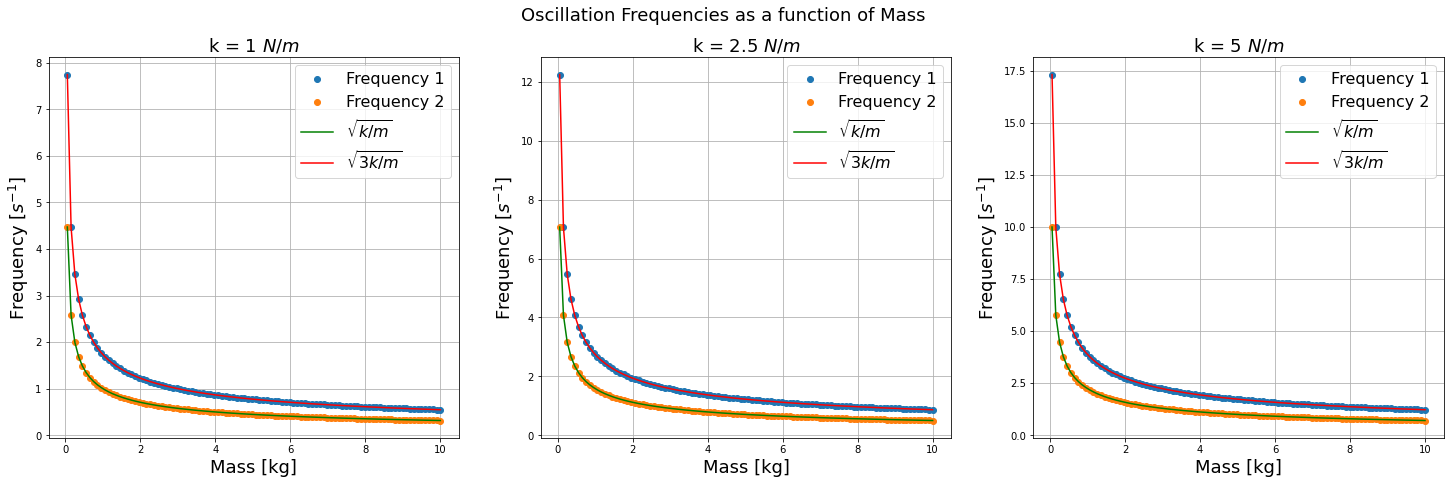

In [23]:
# Set range of masses to plot over
m_low = 0.05 #[kg]
m_high = 10 #[kg]
num_points = 100

k = [1, 2.5, 5] #[N/m] # Spring Constant

masses = np.linspace(m_low,m_high,num_points)
sqrt_masses = masses**0.5

# Make plot axis
fig, axs = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("Oscillation Frequencies as a function of Mass", fontsize=18)

# Form matrix and find the eigenvalues for each of the masses
for i in range(3):
    freq1 = []
    freq2 = []
    for j in range(num_points):
        matrix = form_mat(k[i],masses[j],masses[j])
        f = find_freq(matrix)
        freq1.append(f[0])
        freq2.append(f[1])

    # Plot the masses and frequencies
    axs[i].scatter(masses,freq1, zorder=2, label="Frequency 1")
    axs[i].scatter(masses,freq2, zorder=2, label="Frequency 2")
    axs[i].plot(masses, k[i]**0.5/sqrt_masses, zorder=2, label=r"$\sqrt{k/m}$", color="g")
    axs[i].plot(masses, (3*k[i])**0.5/sqrt_masses, zorder=2, label=r"$\sqrt{3k/m}$", color="r")

    # Label plots
    title = f"k = {k[i]} $N/m$"
    axs[i].set_title(title, fontsize=18)
    axs[i].set_ylabel("Frequency [$s^{-1}$]", fontsize=18)
    axs[i].set_xlabel("Mass [kg]", fontsize=18)
    axs[i].grid(visible=True, zorder=1)
    axs[i].legend(fontsize=16)

### Oscillation Frequencies as a function of mass
One mass is larger than the other

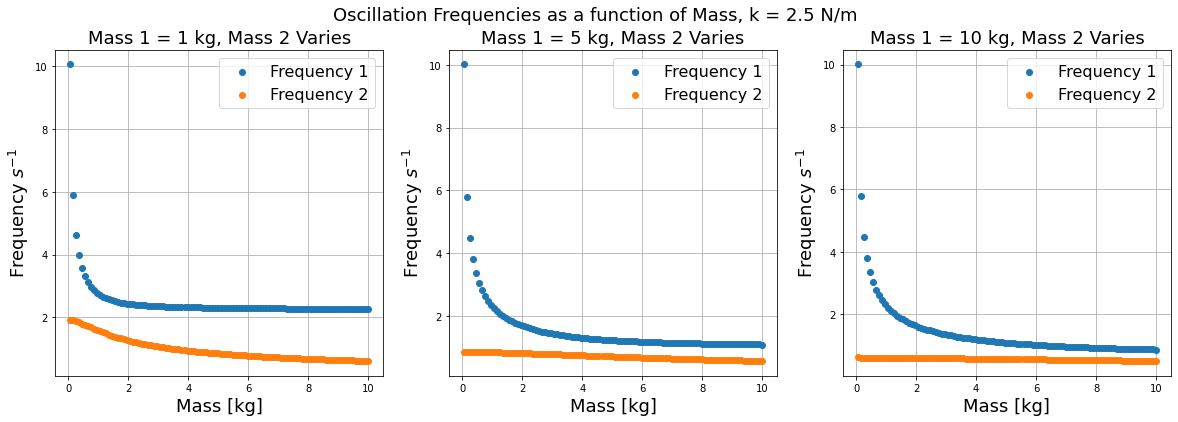

In [24]:
# Set range of masses to plot over
m_low = 0.05 #[kg]
m_high = 10 #[kg]
num_points = 100

k = 2.5 #[N/m] # Spring Constant

# Make plot axis
fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle(f"Oscillation Frequencies as a function of Mass, k = {k} N/m", fontsize=18)

# Form matrix and find the eigenvalues for each of the masses
# ================================================
# First Plot
# ================================================
mass1 = 1 #[kg]
masses1 = np.linspace(mass1,mass1,num_points)
masses2 = np.linspace(m_low,m_high,num_points)
freq1 = []
freq2 = []
for j in range(num_points):
    matrix = form_mat(k,masses1[j],masses2[j])
    f = find_freq(matrix)
    freq1.append(f[0])
    freq2.append(f[1])

# Plot the masses and frequencies
axs[0].scatter(masses,freq1, zorder=2, label="Frequency 1")
axs[0].scatter(masses,freq2, zorder=2, label="Frequency 2")

# Label plots
title = f"Mass 1 = {mass1} kg, Mass 2 Varies"
axs[0].set_title(title, fontsize=18), axs[0].set_ylabel("Frequency $s^{-1}$", fontsize=18), axs[0].set_xlabel("Mass [kg]", fontsize=18), axs[0].grid(visible=True, zorder=1)
axs[0].legend(fontsize=16)

# ================================================
# Second Plot
# ================================================
mass1 = 5 #[kg]
masses1 = np.linspace(mass1,mass1,num_points)
masses2 = np.linspace(m_low,m_high,num_points)
freq1 = []
freq2 = []
for j in range(num_points):
    matrix = form_mat(k,masses1[j],masses2[j])
    f = find_freq(matrix)
    freq1.append(f[0])
    freq2.append(f[1])

# Plot the masses and frequencies
axs[1].scatter(masses,freq1, zorder=2, label="Frequency 1")
axs[1].scatter(masses,freq2, zorder=2, label="Frequency 2")

# Label plots
title = f"Mass 1 = {mass1} kg, Mass 2 Varies"
axs[1].set_title(title, fontsize=18), axs[1].set_ylabel("Frequency $s^{-1}$", fontsize=18), axs[1].set_xlabel("Mass [kg]", fontsize=18), axs[1].grid(visible=True, zorder=1)
axs[1].legend(fontsize=16)

# ================================================
# Third Plot
# ================================================
mass1 = 10 #[kg]
masses1 = np.linspace(mass1,mass1,num_points)
masses2 = np.linspace(m_low,m_high,num_points)
freq1 = []
freq2 = []
for j in range(num_points):
    matrix = form_mat(k,masses1[j],masses2[j])
    f = find_freq(matrix)
    freq1.append(f[0])
    freq2.append(f[1])

# Plot the masses and frequencies
axs[2].scatter(masses,freq1, zorder=2, label="Frequency 1")
axs[2].scatter(masses,freq2, zorder=2, label="Frequency 2")

# Label plots
title = f"Mass 1 = {mass1} kg, Mass 2 Varies"
axs[2].set_title(title, fontsize=18), axs[2].set_ylabel("Frequency $s^{-1}$", fontsize=18), axs[2].set_xlabel("Mass [kg]", fontsize=18), axs[2].grid(visible=True, zorder=1)
axs[2].legend(fontsize=16)

In [25]:
# Find the oscillation frequencies for a coupled oscillator case (this time with 3 masses, 4 springs)
# Make a 3x3 matrix from spring constant, k, and identical masses, m.
k = 2     # [N/m]
m = 0.5   # [kg]
M = form_mat3x3(k,m,m,m)
print(f"Coupled Oscillator Matrix:\n{M}\n")

# Find eigenvalues of matrix M
eigenvals, iterations = find_eigenvals(M)
print(f"Eigenvalues are: {eigenvals[0,0]}, {eigenvals[1,1]}, {eigenvals[2,2]}")
print(f"Found in {iterations} iterations.\n")

# Find the frequencies of the system
freqs = find_freq(eigenvals)
print(f"Frequencies are: {freqs[0].item()} [1/s], {freqs[1].item()} [1/s], {freqs[2].item() } [1/s]")

Coupled Oscillator Matrix:
[[-8.  4.  0.]
 [ 4. -8.  4.]
 [ 0.  4. -8.]]

Eigenvalues are: -13.656854249258165, -8.000000000234218, -2.3431457505076208
Found in 22 iterations.

Frequencies are: 3.695518130034273 [1/s], 2.828427124760398 [1/s], 1.5307337294603593 [1/s]


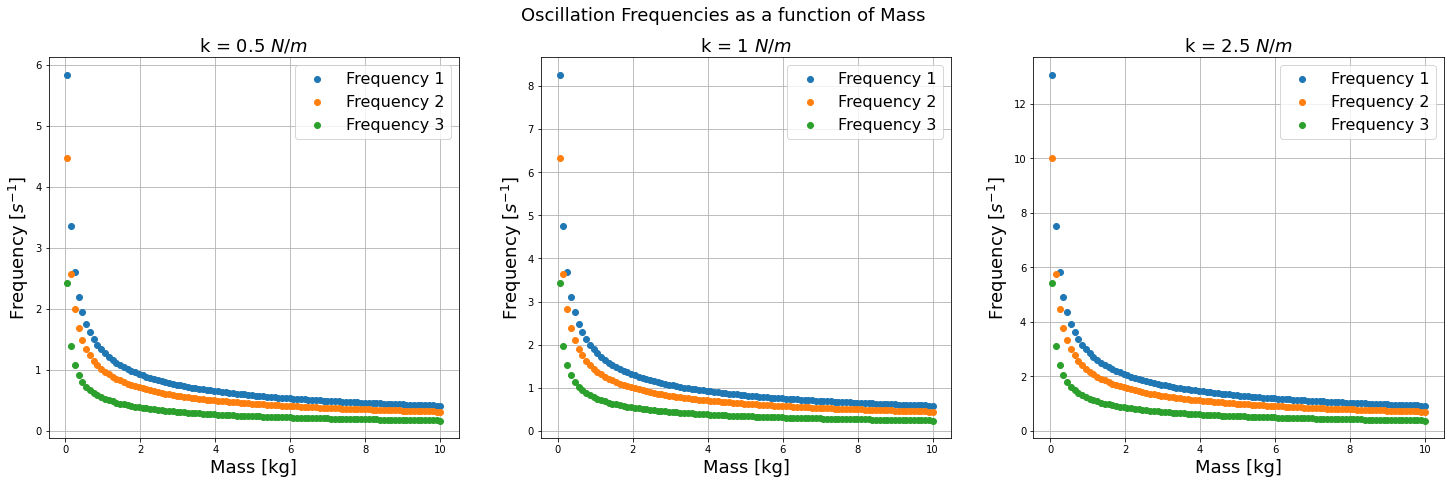

In [26]:
# Set range of masses to plot over
m_low = 0.05 #[kg]
m_high = 10 #[kg]
num_points = 100

k = [0.5, 1, 2.5] #[N/m] # Spring Constant

masses = np.linspace(m_low,m_high,num_points)

# Make plot axis
fig, axs = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("Oscillation Frequencies as a function of Mass", fontsize=18)

# Form matrix and find the eigenvalues for each of the masses
for i in range(3):
    freq1 = []
    freq2 = []
    freq3 = []
    for j in range(num_points):
        matrix = form_mat3x3(k[i],masses[j],masses[j],masses[j])
        f = find_freq(matrix)
        freq1.append(f[0])
        freq2.append(f[1])
        freq3.append(f[2])

    # Plot the masses and frequencies
    axs[i].scatter(masses,freq1, zorder=2, label="Frequency 1")
    axs[i].scatter(masses,freq2, zorder=2, label="Frequency 2")
    axs[i].scatter(masses,freq3, zorder=2, label="Frequency 3")

    # Label plots
    title = f"k = {k[i]} $N/m$"
    axs[i].set_title(title, fontsize=18)
    axs[i].set_ylabel("Frequency [$s^{-1}$]", fontsize=18)
    axs[i].set_xlabel("Mass [kg]", fontsize=18)
    axs[i].grid(visible=True, zorder=1)
    axs[i].legend(fontsize=16)